# Lab 1: Solving Nonlinear Equations

### Topics

- **Mathematics:** convergence and divergence of fixed point iterations; graphical interpretation of convergence criterion.  Newton's method; using a numerical derivative in Newton's method.
- **Python:**
    - Introduction to Jupyter notebooks.
    - Review of COSC131: using commands like `x = g(x)` to update variables; `for` loops; verifying solutions.  Functions; improved format for output; decisions using `if`; testing for convergence.

Checkpoints indicate tasks or questions which your tutor may ask you about.

## Jupyter notebooks

Jupyter notebooks (such as this one you're reading) are a great way to combine text, code, the results of calculations, and more into a single interactive document.

### Notebook cells

Jupyter notebooks are made of cells, which can be either code or text formatted using [Markdown](https://www.markdownguide.org/basic-syntax/).  The type of the current cell is shown in the dropdown menu on the toolbar at the top of the screen, and you can change it there.

To **edit** a code cell, just click where you want to type and start typing.  To edit a Markdown cell, double click the formatted text to see the Markdown formatting codes.

To **run** a code cell or format a Markdown cell, click the run button on the toolbar or press shift-Enter.  To run a cell without moving down to the next one, press control-Enter.

To **insert** a cell, use the Insert menu.  To **split** a cell, use Split Cell in the Edit menu.

Jupyter will automatically print the value returned by the last line of a code cell, unless you end it with a semicolon: `;`

### Kernel

Your Python code is run by an IPython *kernel*.  The kernel holds values of any variables you've defined, and references to any functions you've defined or modules you've imported.  You can't directly see these values, but you can always find out what is in a variable with a `print` statement or putting the variable name alone on the last line of a code cell and running it.

Sometimes this **hidden state** can make your code do different things from what you are thinking.  You can always clear all that state by restarting the kernel with the <i class="fa-repeat fa"></i> button.  This will clear all your variables and functions from the kernel's memory, but will not touch your code, which you can then run again without any old values getting in the way.

To make sure your code all works together, make sure it runs properly when you click **Restart & Run All** in the Kernel menu.

### Plotting

Matplotlib has different ways it can work in Jupyter notebooks.  To get interactive plots rather than the default static ones, you need the line `%matplotlib notebook` before you import matplotlib.pyplot.  The `%` makes a special [“magic” command](https://ipython.readthedocs.io/en/stable/interactive/magics.html).

It's easy to get mixed up which plot you're referring to when you're adding to an existing one, and if you're not careful you can end up modifying an old plot elsewhere in the notebook.  It is *highly recommended* that you:
- Keep all code for each plot in just one cell.
- Use figure and axis objects, i.e. `fig, ax = plt.subplots()` then `ax.plot`, instead of `plt.plot`.  You will often find `plt.plot` used in online examples, so be careful!

### Demo

In [2]:
#Click on this cell to select it, then press shift-Enter to run it and select the next cell.

import numpy as np

#Switch on interactive plots:
%matplotlib notebook
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


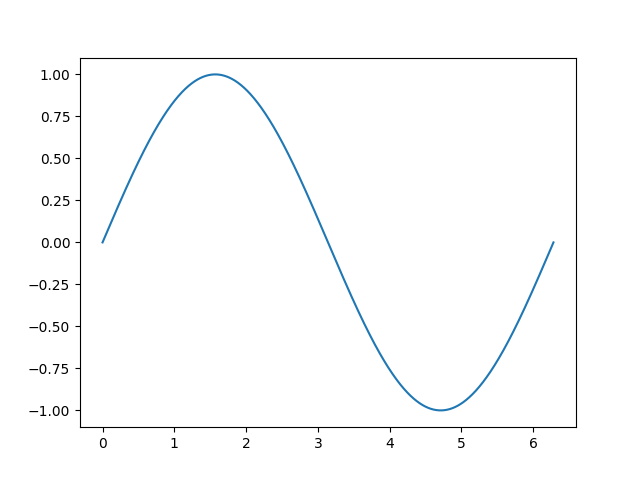

In [3]:
#Run this cell too, and make sure you get a plot.

x = np.linspace(0, 2*np.pi, 1000) #Make a vector of 1000 x values from 0 to 2π.
fig, ax = plt.subplots() #Get figure and axis objects for safer plotting.
ax.plot(x, np.sin(x)); #The ; prevents printing a non-useful text description.

## Fixed point iteration
### Iterations

In this first part of the lab, we will look at Exercise 6.1 from page 157 of Chapra and Canale (5th edition).

The aim is to solve the equation
\begin{equation} \label{eq:lab1_eq1} \tag{1}
  2\sin\left(\sqrt{x}\right) - x = 0
\end{equation}
using iterations of the form

$$
  x_{k+1} = g(x_k).
$$

One way of finding a suitable function $g(x)$ is to rearrange the given equation to the form

$$
  x = g(x).
$$

Then the solution $x$ is a fixed point for the function $g(x)$.

In the first part of this lab you will use the function

$$
  g(x) = 2\sin\left(\sqrt{x}\right)
$$

with the initial guess at a solution as

$$
  x_0 = 0.5
$$

One way of calculating the next few iterations is to follow the mathematical notation

$$
  x_{k+1} = g(x_k),
$$

```
x0 = 0.5
x1 = 2*np.sin(np.sqrt(x0))
x2 = ????
x3 = ????
```

and so on.

Obviously this is a little tedious!  To find a better way of doing the calculations we need to realize that for Python

$$
  x_{k+1} = g(x_k)
$$

is a command, not an equation.

For Python this command says, “Plug $x_k$ into the function $g$, and then store the result in the variable $x_{k+1}$.”

So we do not need to keep introducing new variables x0, x1, x2, x3 and so on.  We can use just one variable to store the latest approximation:

```
x = 0.5
x = 2*np.sin(np.sqrt(x))
x = 2*np.sin(np.sqrt(x))
```

<div class="alert alert-warning">
  <h3 style="margin-top: 0;">Checkpoint 1</h3>

  Starting with $x = 0.5$, determine how many iterations (repetitions) it takes for successive $x$-values agree to four decimal places.
</div>

In [5]:
x = 3.5
for i in range(1, 10):
    x = 2*np.sin(np.sqrt(x))
    print(f"{i} : {x:.4f}")


1 : 1.9107
2 : 1.9646
3 : 1.9715
4 : 1.9723
5 : 1.9724
6 : 1.9724
7 : 1.9724
8 : 1.9724
9 : 1.9724


### Graphical interpretation

We can see why the above iterations converge if we look at the graph of the function $g(x)$.  The fixed point we are looking for occurs where this graph cuts the line $y=x$, so we need to plot $y=g(x)$ and $y=x$ on the same graph.

The following commands set up a range of $x$-values covering the interval $[0, 4]$, store the corresponding $g(x)$ values in the variable `y`, and then plot $y=x$ as a dashed blue line (`'b--'`), and $y=g(x)$ as a solid red line (`'r-'`).

<IPython.core.display.Javascript object>


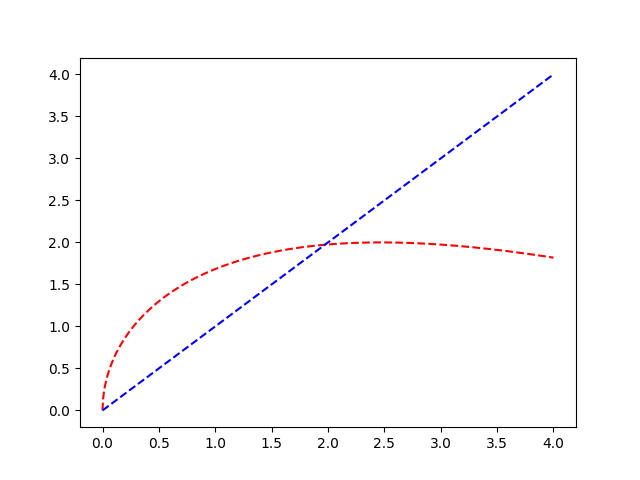

In [7]:
x = np.linspace(0, 4, 1000) 
fig, ax = plt.subplots() 
ax.plot(x, 2*np.sin(np.sqrt(x)), 'r--');
ax.plot(x, x, 'b--')

Try the commands

```
ax.plot?
```

or

```
help(ax.plot)
```

below to see how such plot commands are put together (the `ax` is the variable made by running the code above). 

You can find (much) more information about [Axes.plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.plot.html) in matplotlib's [online documentation](https://matplotlib.org/stable/index.html). You can also find other [examples](https://matplotlib.org/stable/plot_types/index.html) on their [website](https://matplotlib.org/) or read their [basic usage tutorial](https://matplotlib.org/stable/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py).

Most Python modules have online documentation, such as [Python](https://docs.python.org/3/c-api/index.html) itself, [numpy](https://numpy.org/doc/stable/reference/), and [scipy](https://docs.scipy.org/doc/scipy/reference/). You should keep these links handy and refer to them regularly.

In [8]:
ax.plot?

<div class="alert alert-warning">
  <h3 style="margin-top: 0;">Checkpoint 2</h3>

  What would you expect to happen if you started the iterations with $x_0 = 3.5$ instead? (Use the graph! Check your answer by doing a few iterations.)
</div>

In [7]:
# the point where y=x and y=2sin(sqrtx) intersect has a positive slope, so it is monotone
# x0=3.5 gets closer to the intersection faster than x=0.5
x = 3.5
print("x = 3.5")
for i in range(1, 10):
    x = 2*np.sin(np.sqrt(x))
    print(f"{i} : {x:.10f}")

x = 0.5
print("x = 0.5")
for i in range(1, 10):
    x = 2*np.sin(np.sqrt(x))
    print(f"{i} : {x:.10f}")
#Notice x0=0.5

x = 3.5
1 : 1.9106538473
2 : 1.9645607321
3 : 1.9714502227
4 : 1.9722711156
5 : 1.9723680386
6 : 1.9723794699
7 : 1.9723808179
8 : 1.9723809769
9 : 1.9723809956
x = 0.5
1 : 1.2992738782
2 : 1.8171475041
3 : 1.9505739173
4 : 1.9697425133
5 : 1.9720688813
6 : 1.9723441783
7 : 1.9723766560
8 : 1.9723804861
9 : 1.9723809377


### Automated iterations: `for` loops

If you know how many iterations you want to perform, you can use a `for` loop to carry out all the calculations at once.  The following commands should produce the same output as your earlier iterations.

In [9]:
x = 0.5
for k in range(10):
    x = 2*np.sin(np.sqrt(x))
    print(x)

1.299273878160125
1.8171475041374952
1.950573917289759
1.9697425133384816
1.9720688812739464
1.9723441782726674
1.9723766559775857
1.9723804860817313
1.9723809377474428
1.9723809910099313


**Caution:** This is a very easy way to generate lots of output very quickly.  If you want to suppress the output from such a loop, then use semicolons at the end of each command in the loop.  **If you need to stop such a loop before it ends then use the stop button ( <i class="fa-stop fa"></i> ) on the toolbar next to <i class="fa-play fa"></i> Run.**

<div class="alert alert-warning">
  <h3 style="margin-top: 0;">Checkpoint 3</h3>

  Use a `for` loop to carry out 7 steps of the iteration
$$
    x_{k+1} = 2\sin\left(\sqrt{x_k}\right)
$$
  using the starting value $x_0 = 0.01$.  What happens? Why?
</div>

In [10]:
# It converges to the intersection around 1.972 as it staircases towards it.
x = 0.01
for i in range():
    x = 2*np.sin(np.sqrt(x))
    print(f"{i+1} : {x}")

1 : 0.1996668332936563
2 : 0.8642376194402882
3 : 1.602813898942033
4 : 1.9078299129419154
5 : 1.9641766753148189
6 : 1.9714040692640435
7 : 1.9722656606894342


### Another iteration formula

Find a different rearrangement of the original equation

$$
  2\sin\left(\sqrt{x}\right) - x = 0
$$

into the form

$$
  x = g(x).
$$

Write new code below to do 10 iterations using this new $g(x)$, starting with $x_0 = 0.5$.

Plot $y=g(x)$ and $y=x$ on the same graph (make sure you are plotting the function $g(x)$ over an appropriate range of $x$ values).  <b>Note: $x^2$ is written `x**2` in Python.</b>

<div class="alert alert-warning">
  <h3 style="margin-top: 0;">Checkpoint 4</h3>

  - What solutions have you found to equation [(1)](#mjx-eqn-eq:lab1_eq1)?
  - How can you check that they really are solutions?
  - Why did the second rearrangement you used converge to a different value to the first one?
</div>

1 0.06384731133866596
2 0.0010194661813050523
3 2.598278462096788e-07
4 1.6877627416490223e-14
5 7.121357680246561e-29
6 1.2678433802501671e-57
7 4.0185670921104247e-115
8 4.0372203684482086e-230
9 0.0
10 0.0


<IPython.core.display.Javascript object>


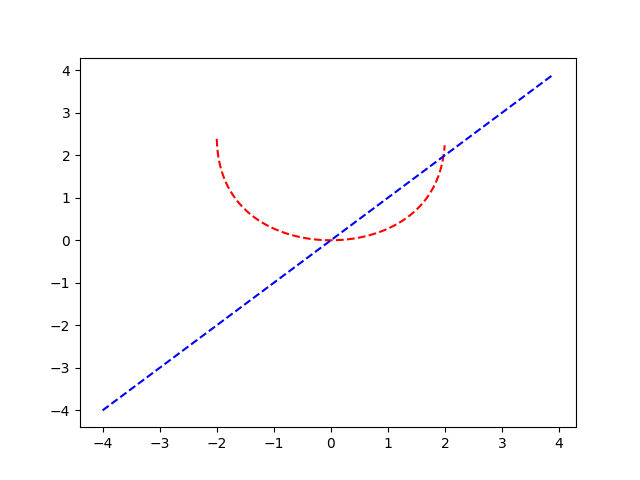

/tmp/ipykernel_18247/842345868.py:12: RuntimeWarning: invalid value encountered in arcsin
  ax.plot(x, np.arcsin(x/2)**2, 'r--');


In [39]:
# Solutions are x = 0 and x approximately = 1.972380998130583397238099813058339723809981305833
# Substitute the number into the original equation and see if it equates to 0.
# arcsinx approximately = x for small values, and every iteration x is halved and squared which reduces it to 0 
# over several iterations as x < 1
x = 0.5
for i in range(10):
    x = np.arcsin(x/2)**2
    print(f"{i+1} {x}")
    
x = np.linspace(-4, 3.9, 1000) #Make a vector of 1000 x values from 0 to 2π.
fig, ax = plt.subplots() #Get figure and axis objects for safer plotting.
ax.plot(x, np.arcsin(x/2)**2, 'r--');
ax.plot(x, x, 'b--')

## Newton's Method

We begin by looking at Chapra and Canale's Exercise 6.4 which asks us to solve the equation

$$
  -1 + 5.5x - 4x^2 + 0.5x^3 = 0
$$

both graphically and using Newton's method.

### Finding initial approximations

Begin by solving the equation graphically: plot this function and $y = 0$ on the same axes to help you find approximations to all the solutions to this equation.  Your approximations do not need to be very accurate, as you are going to use Newton's method to improve the accuracy.

<IPython.core.display.Javascript object>


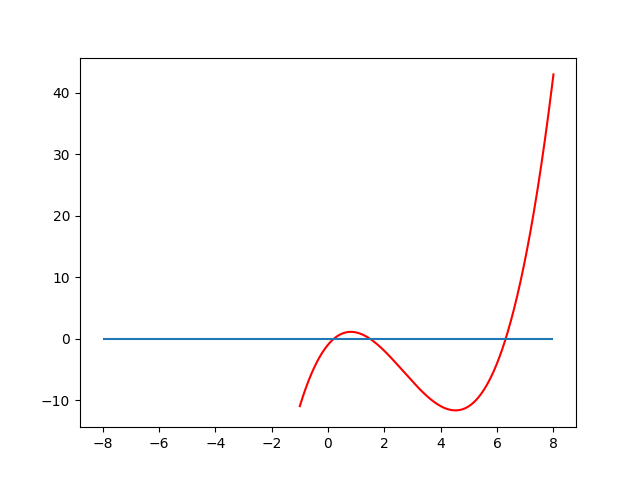

In [40]:
x = np.linspace(-1, 8, 1000) 
fig, ax = plt.subplots() 
ax.plot(x, -1+5.5*x-4*x**2+0.5*x**3, 'r')
ax.hlines(0,-8,8)

### Building a program for Newton's method

The given equation is in the form $f(x) = 0$.  Newton's method solves such equations by using iterations of the form

$$
  x_{k+1} = x_k - \frac{f(x_k)}{f'(x_k)}.
$$

Use the following skeleton to write code which will carry out Newton's method to find one of the solutions to the above equation.  Remember that Python ignores anything after the `#` sign, so you can use this to include comments.

```
x = ???                # the initial approximation to the solution
for k in range(???):   # the number of iterations to be performed
   f = ???             # an expression for f(x)
   dfdx = ???          # an expression for the derivative of f(x)
   x = ???             # the formula for a Newton's method iteration
```

<b>Note: $x^2$ is written `x**2` in Python.</b>

In [30]:
x = 7             # the initial approximation to the solution
for k in range(100):   # the number of iterations to be performed
   f = -1+5.5*x-4*x**2+0.5*x**3             # an expression for f(x)
   dfdx = 5.5 - 8*x+1.5*x**2         # an expression for the derivative of f(x)
   x = x - f/dfdx            # the formula for a Newton's method iteration


### Useful structured output

Typically we would like to know:
- whether the iterations `x` are converging to a stable value,
- whether the function values `f` are getting close to zero, and maybe
- how many iterations have been performed.

Chapra and Canale use tables to show this kind of information – see Section 6.2, page 140, for example – and tables are really just matrices or arrays.  So we could collect the output into the rows of a Numpy array.  However, Numpy arrays work best if you know their size in advance, and it would be nice to have more flexibility (spoiler alert).  So, let's store our iterations by appending to a Python list, and then turn the list into an array when we've finished.

To do this, copy your code into the cell below and make these modifications:
- Before the `for` loop starts, initialise a variable `results` to the empty list:
    
    ```
    results = []
    ```
    
- Add the following line just before the end of the `for` loop:
    
    ```
    results.append([k, x, f])
    ```
    
- Add the following lines just after the end of the `for` loop to convert the list to an array and print it out:
    
    ```
    results = np.array(results)
    results
    ```
    
This command stores the values of `k`, `x` and `f` in the `k`th row of `results` (which is represented by `results[k, :]`).

Run your program and then look at the results table.  Make sure it makes sense.

In [33]:
results = []
x = 7             # the initial approximation to the solution
for k in range(100):   # the number of iterations to be performed
   f = -1+5.5*x-4*x**2+0.5*x**3             # an expression for f(x)
   dfdx = 5.5 - 8*x+1.5*x**2         # an expression for the derivative of f(x)
   x = x - f/dfdx            # the formula for a Newton's method iteration
   results.append([k, x, f])


### More flexible code: functions

At the moment, if you want to try Newton's method with a different starting value or a different number of iterations, you have to edit the code.  Python **functions** let us write more flexible programs which will accept input values and produce output values just like a mathematical function $\sin(x)$ or $\ln(x)$.  Both the input and the output can be one or more arrays, numbers, other functions, etc.

Here is a skeleton of a simple function `newt1`.

```
def newt1(x, num_iter):
    results = []
    for k in range(???):
        f = ???
        dfdx = ???
        x = ???
        results.append([k, x, f])
    return np.array(results)
```

Functions always begin with a line like
```
def newt1(x, num_iter):
```
which declares the function name and indicates the usage in terms of the input variables.  It is good practice to follow this with comments telling the user how the function works, and what each of the input variables represents, and what the output is (the outputs (if any) are defined by `return` statements).  This information can then be obtained using commands in a Jupyter code cell:
```
help(newt1)
```
Or in a separate panel with `?`:
```
newt1?
```

Write a Newton's method function using the above skeleton as a starting point.

<div class="alert alert-warning">
  <h3 style="margin-top: 0;">Checkpoint 5</h3>

  Show the help for **newt1**, and then use the function to find the first 6 Newton's method iterations, using an initial approximation of $x_0=1$.
</div>

In [44]:
def newt1(x, num_iter):
    '''Takes in an initial value x0 and iterates through newton method num_iter amount of times'''
    results = []
    for k in range(num_iter):
        f = -1+5.5*x-4*x**2+0.5*x**3             # an expression for f(x)
        dfdx = 5.5 - 8*x+1.5*x**2         # an expression for the derivative of f(x)
        x = x - f/dfdx 
        results.append([k, x, f])
    return np.array(results)

print(newt1(1, 6))
newt1?

[[ 0.00000000e+00  2.00000000e+00  1.00000000e+00]
 [ 1.00000000e+00  1.55555556e+00 -2.00000000e+00]
 [ 2.00000000e+00  1.48272295e+00 -2.41426612e-01]
 [ 3.00000000e+00  1.47977454e+00 -9.03415512e-03]
 [ 4.00000000e+00  1.47976948e+00 -1.54510087e-05]
 [ 5.00000000e+00  1.47976948e+00 -4.55822047e-11]]


## Better control within the loop: if

Convergence sometimes happens before the set number of iterations, and it makes sense to stop the calculations as soon as we have the desired accuracy.  We can do this by using an `if` block to test for convergence and then leave the loop if convergence is achieved.

To test for convergence, it is customary to look at successive approximations $x_{k+1}$ and $x_k$ and see if they are close enough together.  Thus if we had a tolerance of $\epsilon$, we could test for

$$
  \frac{| x_{k+1} - x_k |}{| x_{k+1} |} < \epsilon
$$

For Newton's method the difference between successive approximations is $- f(x_k) / f'(x_k)$ so we just need to separate out this part of the calculation for later use.

Copy your `newt1` function to the cell below and make the following changes:
- Make it a function of three variables:
```
def newt2(x, num_iter, tol):
```
    where `tol` represents the desired tolerance ($\epsilon$).
- Update the help part of the function.
- Modify the commands within the `for` loop so that the function stops as soon as the criterion for convergence is satisfied.  **Hints:** you will need to use an `if` block with `abs` to test if the criterion is satisfied; you can use the `break` command to jump out of the loop and run the code after it, or the `return` command to tell Python to stop running the function and return the outputs immediately.

<div class="alert alert-warning">
  <h3 style="margin-top: 0;">Checkpoint 6</h3>

  Check that the new version does indeed stop early if you ask it to perform 10 iterations with an initial value $x_0=1$, and a tolerance of $10^{-4}$.  (Python's notation for $10^{-4}$ is `1e-4`, where you can think of the `e` as meaning “times 10 to the power of”.)
</div>

In [79]:
def newt2(x, num_iter, tol):
    '''Takes in an initial value x0 and iterates through newton method num_iter amount of times. Will stop if 
    abs(xk+1 - xk)/abs(xk+1) is less than the tolerance'''
    results = []
    for k in range(num_iter):
        prev_value = x
        f = -1+5.5*x-4*x**2+0.5*x**3             # an expression for f(x)
        dfdx = 5.5 - 8*x+1.5*x**2         # an expression for the derivative of f(x)
        x = x - f/dfdx 
        if abs(x-prev_value)/abs(x) < tol:
            break
        results.append([k, x, f])
        
    return np.array(results)

print(newt2(1, 100, 10e-4))

[[ 0.          2.          1.        ]
 [ 1.          1.55555556 -2.        ]
 [ 2.          1.48272295 -0.24142661]
 [ 3.          1.47977454 -0.00903416]]


## A more general function

Python functions can take other functions as inputs, so we can make a general Newton's method function instead of making a new Newton's method function for every equation we want to solve.

Copy your `newt2` function to the cell below and make the following changes:
- Make it a function of five variables:
```
def newt(x, num_iter, func, deriv, tol=1e-4):
```
    where `func` and `deriv` are functions that calculate $f(x)$ and $f'(x)$ respectively, and where we have provided a default value for `tol`.
- Update the help part of the function.
- Modify the commands within the `for` loop to use `func` and `deriv`.  It can now work with any equation we pass in functions for.

## Slow convergence

Use your function `newt` to solve the equation

$$
  x^3 - x - 0.3849 = 0.
$$

You can define functions for the left hand side and its derivative either with `def`, or with `lambda x: ...`.

Plot the graph and use it to find suitable starting values.  Then use your function to produce tables showing iterations which converge to each of the **three solutions**.

Is there a connection between the shape of the graph and the speed of convergence?

## No convergence

Now use `newt` to solve the equation

$$
  x^3 - x - 0.385 = 0.
$$

Produce tables to show what happens if you carry out Newton's method starting with the three solutions to the previous equation as your initial approximations.

<div class="alert alert-warning">
  <h3 style="margin-top: 0;">Checkpoint 7</h3>

  - How many solutions are there to each of the two equations above?
  - What should you be looking for in the 3rd column of the `results` matrix?
  - Can you explain the difference in number of iterations required to find the different solutions?
  - Can you explain why, for the final equation, Newton's method does not converge for certain starting values?
</div>

In [1]:
# 1.The first equation has three solutions, while the second equation has two solutions
# 2.The 3rd column should be getting smaller as we get closer to convergence
# 3.For the difference in Func1 points, some starting values are closer and so require less iterations to get a value
# Func2 uses a lot more iterations as it tries to converge, however it cannot.
# 4.Certain starting values try to converge to a point where the gradient is zero, which newtons method cannot do as
# that would require dividing by zer0

def newt(x, func, deriv, num_iter, tol=1e-4):
    '''Takes in an initial value x0, a function and the derivative and iterates through newton method num_iter 
    amount of times. Will stop if abs(xk+1 - xk)/abs(xk+1) is less than the tolerance'''
    results = []
    for k in range(num_iter):
        prev_value = x
        f = func(x)           # an expression for f(x)
        dfdx = deriv(x)      # an expression for the derivative of f(x)
        x = x - f/dfdx 
        results.append([k, x, f])
        if abs(x-prev_value)/abs(x) < tol:
            break
        
    return np.array(results)

func1 = lambda x: x**3 - x - 0.3849
func2 = lambda x: x**3 - x - 0.385
deriv = lambda x: 3*x**2 - 1

x = np.linspace(-2, 2, 1000) 
fig, ax = plt.subplots() 
ax.plot(x, func1(x), 'r')
ax.hlines(0,-2,2)
# Here func1 converges to -5.77727276e-01
print("Func1 table x0=-1")
print(newt(-1, func1, deriv, 100))
# Here func1 converges to -5.77014699e-01
print("Func1 table x0=0")
print(newt(0, func1, deriv, 100))
# Here func1 converges to 1.15470051e+00
print("Func1 table x0=2")
print(newt(2, func1, deriv, 100))

print("Func2 table x0=-5.77727276e-01")
print(newt(-5.77727276e-01,func2,deriv,100))
print("Func2 table x0=-5.77014699e-01")
print(newt(-5.77014699e-01,func2,deriv,100))
print("Func3 table x0=1.15470051e+00")
print(newt(1.15470051,func2,deriv,100))



NameError: name 'np' is not defined

## Numerical approximation to the derivative
Sometimes you will need to solve an equation of the form $f(x)=0$ where $f$ is a complicated function that is not easy to differentiate analytically, for example

$$
  f(x) = \frac{x^2 \cos(x^2) \exp(x)}{3x+2+x\ln(x)}.
$$

In such cases, you can calculate a numerical approximation to the derivative $f'(x)$ for use in Newton's method.  One such approximation is the forward difference approximation:

$$
  f'(x) \approx \frac{f(x+h)-f(x)}{h},
$$

where $h$ is a small number, e.g. $10^{-6}$.

Copy your `newt` function to the cell below, and change the first line to give `deriv` a default value of `None` and to add a parameter `h`:

```
def newt(x, num_iter, func, deriv=None, tol=1e-4, h=1e-6):
```

Now write an `if` statement in your new `newt` that uses the numerical approximation if `deriv` is `None` and otherwise uses `deriv` as before.

<div class="alert alert-warning">
  <h3 style="margin-top: 0;">Checkpoint 8</h3>

  Use your new function to find the root of $f(x)=0$ using a starting value of $x=1.5$.
</div>

In [76]:
def newt(x, func, num_iter, deriv=None, tol=1e-4, h=1e-6):
    '''Takes in an initial value x0, a function and the derivative and iterates through newton method num_iter 
    amount of times. Will stop if abs(xk+1 - xk)/abs(xk+1) is less than the tolerance.'''
    if deriv == None:
        deriv = lambda x: (func(x+h)-func(x))/h
    results = []
    for k in range(num_iter):
        prev_value = x
        f = func(x)           # an expression for f(x)
        dfdx = deriv(x)      # an expression for the derivative of f(x)
        x = x - f/dfdx 
        results.append([k, x, f])
        if abs(x-prev_value)/abs(x) < tol:
            break
        
    return np.array(results)

func3 = lambda x: ((x**2)*np.cos(x**2)*np.exp(x))/(3*x+2+x*np.log(x))
print(newt(1.5, func3, 100, deriv=None, tol=1e-4, h=1e-6))

[[ 0.00000000e+00  1.31581921e+00 -8.91136929e-01]
 [ 1.00000000e+00  1.26053781e+00 -1.63586140e-01]
 [ 2.00000000e+00  1.25343082e+00 -1.67568753e-02]
 [ 3.00000000e+00  1.25331417e+00 -2.66306652e-04]]
